# load dataset and initialize vectors

In [1]:
from keras.datasets import imdb 

In [2]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data( num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

In [4]:
train_labels[0]

1

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
# vectorize data and its labels
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Part 1: Compare Different Compiler Setups

In [7]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [40]:
n_layers = 2

n_units = 2            # units per layer

act = ['relu','tanh']
act = act[0]            # activation function

loss_fxn = ['binary_crossentropy','mse'] 
loss_fxn = loss_fxn[1]  # loss function

In [41]:
n_layers, n_units, act, loss_fxn

(2, 2, 'relu', 'mse')

## add hidden layers to the model

In [42]:
if n_layers == 1:
  # one hidden layer
  model = models.Sequential()
  model.add(layers.Dense(n_units, activation=act, input_shape=(10000,)))
  plt_title = '1 layer'

elif n_layers == 2:
  # two hidden layers
  model = models.Sequential()
  model.add(layers.Dense(n_units, activation=act, input_shape=(10000,)))
  model.add(layers.Dense(1, activation='sigmoid'))
  plt_title = '2 layers'

elif n_layers == 3:
  # three hidden layers
  model = models.Sequential()
  model.add(layers.Dense(n_units, activation=act, input_shape=(10000,)))
  model.add(layers.Dense(n_units, activation=act))
  model.add(layers.Dense(1, activation='sigmoid'))
  plt_title = '3 layers'

else: print('invalid input for num. layers')


In [43]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=loss_fxn,
              metrics=['accuracy'])

## loss function

In [44]:
if loss_fxn == 'mse':
  model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                loss=losses.mse,
                metrics=[metrics.binary_accuracy])
  
elif loss_fxn == 'binary_crossentropy':
  model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
  
else: print('invalid loss function')

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## fit model with some training data

In [46]:
model.compile(optimizer='rmsprop',
              loss=loss_fxn,
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.2249 - acc: 0.6471 - val_loss: 0.2007 - val_acc: 0.6857
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1872 - acc: 0.7769 - val_loss: 0.1823 - val_acc: 0.7887
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1704 - acc: 0.8363 - val_loss: 0.1725 - val_acc: 0.8236
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1590 - acc: 0.8727 - val_loss: 0.1667 - val_acc: 0.8252
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1502 - acc: 0.8950 - val_loss: 0.1606 - val_acc: 0.8526
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1429 - acc: 0.9109 - val_loss: 0.1569 - val_acc: 0.8533
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1364 - acc: 0.9223 - val_loss: 0.1543 - val_acc: 0.8519
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1307 - a

## plot loss over time

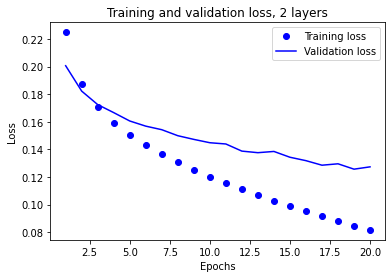

In [47]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss, '+plt_title)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()